In [1]:
import pandas as pd
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_colwidth', -1)
import re
import numpy as np
import unicodedata


<ipython-input-1-f92c4802df1f>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
data = pd.read_csv("../../pycharm_project/healthtap_full_qa_processed_30k_words.csv")


In [3]:
data = data[['question', 'answer']]

In [4]:
data.dropna(inplace=True)

In [5]:
qa_pairs = data.values.tolist()

In [6]:
words = {}


In [7]:
data.head()

,question,answer
0,like years ago to now i have had some reoccurring itching and when i scratched some burning n vagina no pain never and never noticed :url: it herpes ?,test to see if you are a carrier of herpes simplex . or see gynecologist or dermatologist when burning or itching starts but would need to see lesions if possible . perhaps it could be a yeast infection which can be cultured
1,my year old daughter complains about vaginal itching and discomfort . we do not do bubble baths . what can i do for her ?,make sure she is not . wearing tight fitting :unk: or tight jeans . :unk: are better . you can try using vagisil powder to help vaginal :url: is also very important .
2,my year old daughter complains about vaginal itching and discomfort . we do not do bubble baths . what can i do for her ?,take her to a gyn . gynecologists are trained to perform vulvar or vaginal exams on children . call your own gyn and see if she could do it or if she could refer you to a colleague who may have a special focus on pediatric gynecology .
3,my friend is experiencing irritation and she said it s swollen down their she told me that she put a tampon with yogurt up and it swollen ?,followup with doc . some women use yoghurt as a home remedy for vaginitis . however as she is now having swelling in addition to irritation she needs to follow up with a doctor . also avoid douching and any other home remedies in her vagina .
4,my friend is experiencing irritation and she said it s swollen down their she told me that she put a tampon with yogurt up and it swollen ?,worrisome . sounds like a self treatment for vaginosis . there may be something in the yogurt that she is reacting to or the original problem may be getting :url: may be a good idea to remove the tampon and rinse the area with a plain douche schedule a visit with her doc soon .


In [8]:
for pair in qa_pairs:
    for word in pair[0].split(' '):
        if word not in words:
            words[word] = 1
        else:
            words[word] += 1
    for word in pair[1].split(' '):
        if word not in words:
            words[word] = 1
        else:
            words[word] += 1

In [9]:
len(words)

31578

In [18]:
new_dict = {}
for (key, value) in words.items():
    if value < 80:
        new_dict[key] = value

In [19]:
len(new_dict)

11349

In [58]:
new_dict.keys()

dict_keys(['irratiance', 'dwight', 'orangs', 'milkylike', 'whire', 'vaginismic', 'tohaveandhavenot', 'bacall', 'exercises:http:', 'perineorrhaphy', 'putrescent', 'cadaverene', 'trichononas', 'metrinodazale', 'tirchamonas', 'withoutprotection', 'bacterialvaginosis', 'vagininits', 'thanyogurt', 'leukoorhea', "sheba's", 'cervovaginitis', 'profluens', 'cultured:you', 'vaginoscope', 'wonderchild', 'bartolini', 'caspar', 'canhappen', 'uncirumized', 'stayhere', 'chchroid', 'andwhen', 'intintercourse', 'fragileness', 'discomfortthere', 'cottagecheese', 'aubreyochu', 'wateryodorless', 'thenoutside', 'rubberyovulation', 'rocephline', 'gynazle', 'gynacoside', 'clarazole', 'monthsback', 'vestibultis', 'ashokkumar', 'gynceclogisr', 'plylonephis', 'andburns', 'antiboctis', 'seemproctologist', 'ressler', 'tercolazole', 'zithermax', 'youcanbutifnobeter', 'whatcoulditb', 'badlowerpain', 'urinatingand', 'andclaymidia', 'ammoxacillan', 'clindamhcin', 'suddenlywhen', 'overthrowing', 'quadrilateral', 'cris

In [35]:
words = new_dict.keys()

In [10]:
data = pd.read_csv("../../data/healthtap_full_qa.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287925 entries, 0 to 2287924
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   question    object
 2   answer      object
dtypes: int64(1), object(2)
memory usage: 52.4+ MB


In [11]:
data = data[['question', 'answer']]

In [12]:
data = data.head(1000)

In [13]:
data.to_csv('../../data/healthtap_1000_qa.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287925 entries, 0 to 2287924
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   question  object
 1   answer    object
dtypes: object(2)
memory usage: 34.9+ MB


In [7]:
question_words = data.question.str.split(expand=True).stack().value_counts()


<AxesSubplot:>

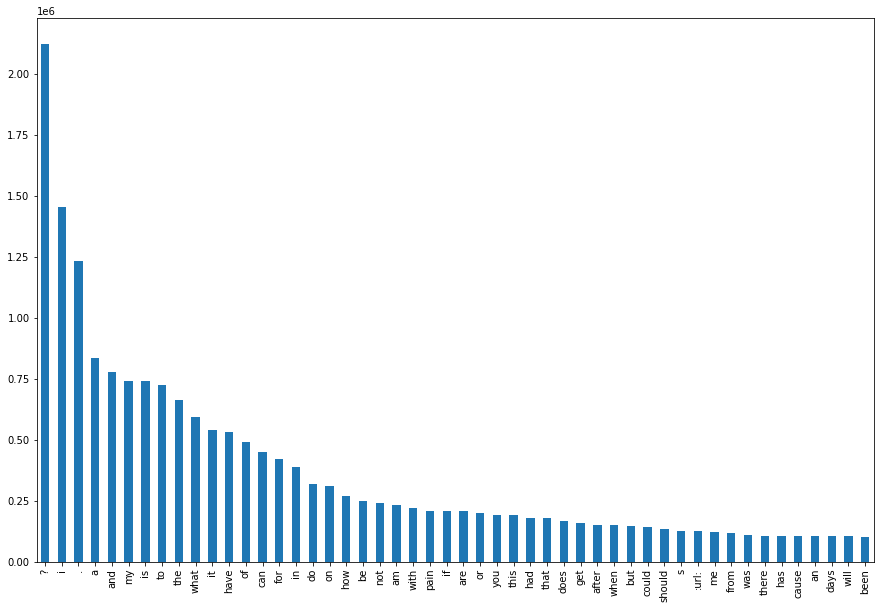

In [8]:
question_words[:50].plot(kind="bar", figsize=(15,10))

In [ ]:
answer_words = data.answer.str.split(expand=True).stack().value_counts()

In [ ]:
question_words

In [ ]:
all_words = question_words.add(answer_words, fill_value=0)

In [ ]:
all_words_df = pd.DataFrame(all_words)

In [ ]:
all_words_df.info()

In [ ]:
all_words_df = all_words_df.sort_values(by=[0], ascending=False)
all_words_df.head()

In [ ]:
all_words_df.tail(1000)

In [ ]:
from spellchecker import SpellChecker


In [ ]:
spell = SpellChecker()

def spell_correction(text):
    return spell.correction(text)

In [ ]:
data['question'] = data.apply(lambda x: spell_correction(x['question']), axis=1)

In [ ]:
data['answer'] = data.apply(lambda x: spell_correction(x['answer']), axis=1)

In [ ]:
question_words = data.question.str.split(expand=True).stack().value_counts()


In [ ]:
answer_words = data.answer.str.split(expand=True).stack().value_counts()


In [ ]:
all_words = question_words.add(answer_words, fill_value=0)

In [ ]:
all_words_df = pd.DataFrame(all_words)

In [ ]:
all_words_df.info()

In [ ]:
data[data.isna().any(axis=1)]

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

In [ ]:
full_data_path = '../../data/healthtap_full_qa_processed.csv'
data.to_csv(full_data_path)

In [ ]:
data.sample(n=100)

In [ ]:
data['answer'] = data['answer'].astype(str)
data['question'] = data['question'].astype(str)


In [ ]:
data[data.isna()]

In [ ]:
data[data.answer.isna()]


In [ ]:
data.dropna(inplace=True)


In [ ]:
full_data_path = '../../data/healthtap_full_qa_processed.csv'
data.to_csv(full_data_path)

In [ ]:
data[data.answer.str.contains('how many strains is there')]


In [ ]:
data.info()

In [ ]:
drs1 = data[data.question.str.contains(" drs ")]
drs2 = data[data.question.str.contains("drs")]
drs2.info()

In [ ]:
data.to_csv("../../data/healthtap_full_qa_processed.csv")

In [ ]:
def fix_words(text):
    text = re.sub(r" drs ", r" doctors ", text)
    text = re.sub(r"^drs ", r"doctors ", text)
    text = re.sub(r" drs$", r" doctors", text)
    return text
    

In [ ]:
drs3 = pd.concat([drs1, drs2]).drop_duplicates(keep=False)

In [ ]:
import re

In [ ]:
drs3['question'] = drs3.apply(lambda x: fix_words(x['question']), axis=1)

In [ ]:
drs3

In [ ]:
data[data.answer.str.contains("it s")]